In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

plt.style.use("ggplot")

In [44]:
def animate_bar_chart(arr : np.array, save_path : str, animate_nth = 1, delay_between_frames=200, x_label='', y_label=''):

    fig = plt.figure()
    ax  = fig.add_subplot()
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    artists = []
    x_vals  = np.arange(arr.shape[1])

    for i in range(arr.shape[0]):

        if i % animate_nth == 0:
            height      = arr[i,:]
            container   = ax.bar(x=x_vals, height=height, color='tab:blue')
            artists.append(container)
    
    anni = animation.ArtistAnimation(fig=fig, artists=artists, interval=delay_between_frames)
    anni.save(save_path)

In [45]:
gamma   = 0.5
chi     = 0.0
results = np.loadtxt(f"data/wealth_final_{gamma}_{chi}.csv")
agents  = np.arange(results.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


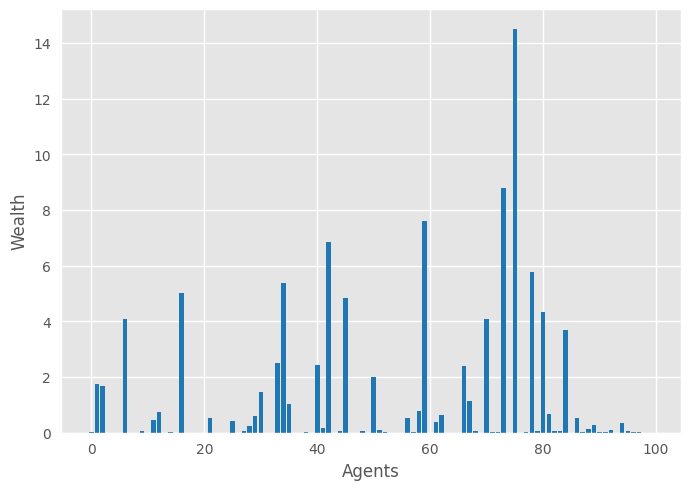

In [46]:
animate_nth = 10
animate_bar_chart(arr=results, save_path=f'plots/animation_{gamma}_{chi}.gif', animate_nth=animate_nth, x_label='Agents', y_label='Wealth')